# Module 1: Data Science Fundamentals

## Sprint 2: Statistical Tests and Experiments

## Let's analyse Udacity A/B test!

<div><img style="height: 350px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Udacity_logo.png" /></div>

## Background

For the last day of this sprint, we are analyzing once run, online Udacity A/B test results! The dataset is part of the Udacity Google's A/B testing course, which we have watched a couple of lessons from in Subproject 2 of this sprint.

Data is available at https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0

---------

## How to start?

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
import scipy.stats as st
from scipy import mean
import itertools


In [30]:
def GetPValue(sdv):
  """P value is equal to 1 - Standard Normal Value of Z score"""
  return 1-sdv

def StatisticsSignificance(list1, list2, alpha):
  """Gets 2 list and returns:
      1. Ratio of sample variance
      2. Pooled Estimate of SP
      3. Standard Error
      4. MarginOfError
      5. Mean difference
      6. Lower CI
      7. Upper CI
      8. ZScore
      9. Pvalue for Ztest """
  n1 = list1.count()
  n2 = list2.count()
  x1 = list1.mean()
  x2 = list2.mean()
  s1 = list1.std()
  s2 = list2.std()
  meandiff = x1 - x2
  RS_p = math.pow(s1,2)/ math.pow(s2,2)
  SP_p = math.sqrt((((n1 -1 )* math.pow(s1,2)) + ((n2 - 1) * math.pow(s2,2)))/(n1+n2-2))
  StandardError = SP_p * (math.sqrt((1/n1) + (1/n2)))
  MarginOfError = alpha * StandardError
  lowerCI = meandiff - MarginOfError 
  upperCI = meandiff + MarginOfError
  zscore = meandiff / math.sqrt((math.pow(s1,2)/n1) + (math.pow(s2,2)/n2))
  pvalue = st.norm.sf(abs(zscore))*2
  
  return  RS_p, SP_p, StandardError, MarginOfError, meandiff, lowerCI, upperCI, zscore, pvalue


def TtestStatisticsSignificance(list1, list2, alpha):

  n1 = list1.count()
  n2 = list2.count()
  x1 = list1.mean()
  x2 = list2.mean()
  s1 = list1.std()
  s2 = list2.std()
  df = n1+n2-2
  meandiff = x1 - x2
  H = (math.pow(s1,2)*(n1-1) + math.pow(s2,2)*(n2-1))/(1*n1 + 1*n2 - 2)
  S = math.sqrt((H/n1) +  (H/n2))
  t = meandiff/S
  t2 =  (meandiff )/math.sqrt((math.pow(s1,2)/n1) + (math.pow(s2,2)/n2))
  t3 = meandiff/ ((math.sqrt(H) *  math.sqrt((1/n1) + (1/n2))))
  #j =   math.sqrt((math.pow(s1,2)/n1) + (math.pow(s2,2)/n2))
  pvalue = st.t.sf(abs(t), df=df)*2
  marginoferror = S * alpha
  lowerCI = meandiff - marginoferror
  upperCI = meandiff + marginoferror

  
  return   df, meandiff, S, t,pvalue,marginoferror, lowerCI,upperCI


The data consists of two sheets, each for different group of the test. Download the sheets as CSVs and union them to form 1 dataset.

In [31]:
control = pd.read_excel("/content/Final Project Results.xlsx", "Control")
experiments = pd.read_excel("/content/Final Project Results.xlsx", "Experiment")
d = [control, experiments]
dataset = pd.concat(d)
dataset.shape

(74, 5)

## Concepts to explore

You will mostly focus on statistical hypothesis testing in this project on real-life data.

In [32]:
#click through rate
controlsSize = control.shape[0]
experimentsSize = experiments.shape[0]
datasetSize = dataset.shape[0]

## Requirements

* Visualize 95% confidence interval between control and experiment groups on [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) metric. Explain what the confidence interval means, what's the relationship with the population of a group.
* Verify that the difference in each of the metrics between control and experiment groups is statistically significant using z-test, 95% confidence level.
* Verify that the difference in each of the metrics between control and experiment groups is statistically significant using t-test, 95% confidence level.
* Compare both test method results. Explain why they differ / do not differ that much and why.
* Choose 1 method (either z or t) and explore statistical significance of any metric under different confidence levels - 60%, 90%, 95%, 99%. If conclusions about significance differ under different confidence levels, explain why.
* Calculate p-values.

In [33]:
control["CTR"] = control['Clicks']/control['Pageviews']
experiments["CTR"] = experiments['Clicks']/experiments['Pageviews']
dataset['CTR'] = dataset['Clicks']/dataset['Pageviews']

-0.5609719736130521


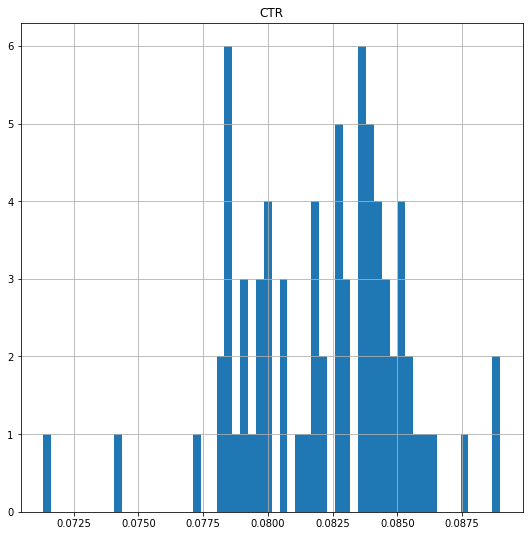

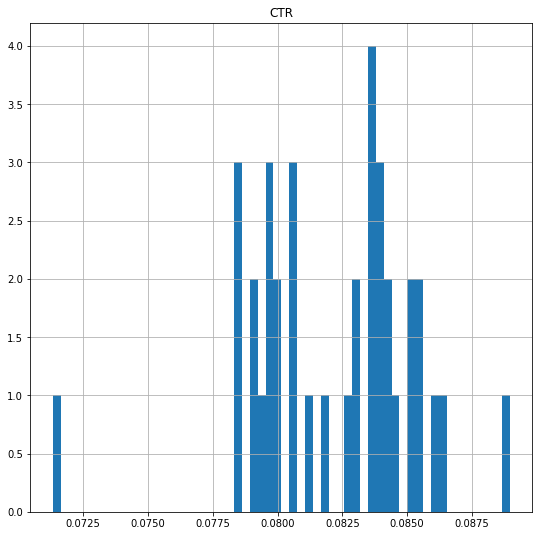

In [34]:
pd.DataFrame(dataset['CTR']).hist(bins=58,                                
                                  figsize=(9,9))

pd.DataFrame(control['CTR']).hist(bins=58,                                
                                  figsize=(9,9))

print( st.skew(dataset['CTR']) );

## Visualize 95% confidence interval between control and experiment groups on click-through rate metric. Explain what the confidence interval means, what's the relationship with the population of a group.

In [35]:
SS = StatisticsSignificance(control['CTR'], experiments['CTR'], 1.96)
SS

(1.0736926569117418,
 0.0031728617084568447,
 0.0007376753633375771,
 0.001445843712141651,
 -6.124629702468354e-05,
 -0.0015070900091663346,
 0.0013845974151169675,
 -0.08302608446563484,
 0.9338307988101693)

1. Ratio of sample variance = 1.0734 which means the equality of population variance is reasonable since result is between 0.5 and 2
2. Pooled Estimate of Standard Deviation = 0.00317
3. Standard Error = 0.0007
4. Margin Of Error = 0.0014
5. Mean difference = -6.1246e-05
6. Lower CI = -0.0015
7. Upper CI = 0.0014
8. Zscore = -0.0830
9. Pvalue = 0.9338

With 95% confidence, the difference between controls and experiments is between -0.0015 and 0.0014. The result 0.9338 (93.38%) is NOT SIGNIFICANT at p < 0.05, the difference between the average of the CTR controls and CTR experiments populations is not big enough to be statistically significant

([<matplotlib.axis.YTick at 0x7f210d48df10>], [Text(0, 0, 'D')])

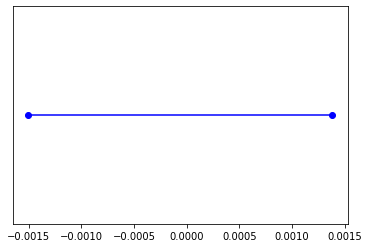

In [36]:
plt.plot((SS[5],SS[6]),(1,1),'ro-',color='blue')
plt.yticks(range(1),'Difference')

Based on the interval shown above, we also conclude that there is no statistically significant difference in COntrols and Experiment CTR, because the 95% confidence interval includes the null value, zero. Since zero is included in the CI range, there is no sufficient evidence to conclude that there is a difference between Controls CTR and Experiment CTR

## Verify that the difference in each of the metrics between control and experiment groups is statistically significant using z-test, 95% confidence level.

### Page view

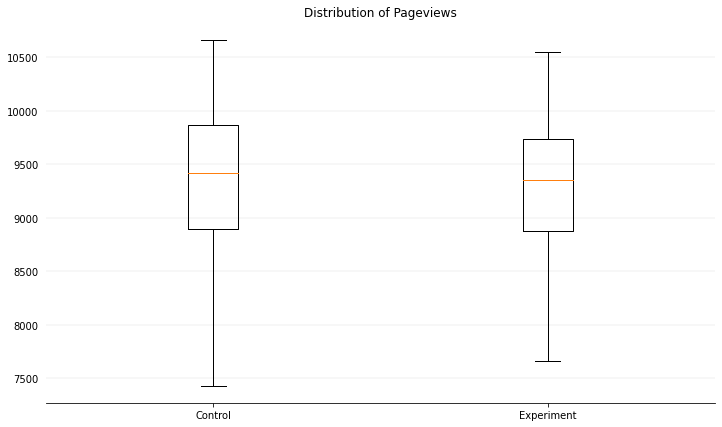

In [37]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Distribution of Pageviews')
dataset = [control['Pageviews'], experiments['Pageviews']]
labels = ['Control','Experiment']

ax.boxplot(dataset, labels = labels)
plt.show()

In [38]:
SSp = StatisticsSignificance(control['Pageviews'], experiments['Pageviews'], 1.96)
SSp

(1.0929272113518451,
 724.3337774611723,
 168.4041825845047,
 330.0721978656292,
 23.864864864865012,
 -306.2073330007642,
 353.93706273049423,
 0.14171182982874964,
 0.887307630398175)

1. Ratio of sample variance = 1.0929 which means the equality of population variance is reasonable since result is between 0.5 and 2
2. Pooled Estimate of Standard Deviation = 724.33
3. Standard Error = 168.40
4. Margin Of Error = 330.07
5. Mean difference = 23.8649
6. Lower CI = -306.20
7. Upper CI = 353.94
8. Zscore = 0.1417
9. Pvalue = 0.8873

With 95% confidence, the difference between controls and experiments is between -306.20 and 353.94. The result 0.8873 is NOT SIGNIFICANT at p < 0.05,  the difference between the average of the Controls and Experiments pageviews populations is not big enough to be statistically significant.

### Clicks

In [39]:
SSc = StatisticsSignificance(control['Clicks'], experiments['Clicks'], 1.96)
SSc

(1.1181469858835251,
 66.45844170964645,
 15.451273846680305,
 30.2844967394934,
 1.4324324324325062,
 -28.852064307060893,
 31.716929171925905,
 0.0927064296863953,
 0.9261367888616749)

1. Ratio of sample variance = 1.1181 which means the equality of population variance is reasonable since result is between 0.5 and 2
2. Pooled Estimate of Standard Deviation = 66.4584
3. Standard Error = 15.4513
4. Margin Of Error = 30.2845
5. Mean difference = 1.4324
6. Lower CI = -28.8521
7. Upper CI = 31.7169
8. Zscore = 0.0927
9. Pvalue = 0.9261

With 95% confidence, the difference between controls and experiments is between -28.8521 and 31.7169.  The result 0.9261 is NOT SIGNIFICANT at p < 0.05, the difference between the average of the controls and experiment clicks populations is not big enough to be statistically significant.

### Enrollment

In [40]:
SSe = StatisticsSignificance(control['Enrollments'], experiments['Enrollments'], 1.96)
SSe

(0.8135892242397348,
 31.64754640846411,
 9.332352299933675,
 18.29141050787,
 15.739130434782595,
 -2.552280073087406,
 34.03054094265259,
 1.6865126742905376,
 0.09169709598021018)

1. Ratio of sample variance = 0.8136 which means the equality of population variance is reasonable since result is between 0.5 and 2
2. Pooled Estimate of Standard Deviation = 31.6475
3. Standard Error = 9.3323
4. Margin Of Error = 18.2914
5. Mean difference = 115.73
6. Lower CI = -2.5522
7. Upper CI = 34.0305
8. Zscore = 1.6865
9. Pvalue = 0.0917

With 95% confidence, the difference between controls and experiments is between -2.5522 and 34.0305.  The result 0.0917 is NOT SIGNIFICANT at p < 0.05,  the difference between the average of Controls and Experiments enrollment populations is not big enough to be statistically significant.

### Payments

In [41]:
SSpa = StatisticsSignificance(control['Payments'], experiments['Payments'], 1.96)
SSpa

(0.8018595870557278,
 21.888732279200497,
 6.454635009992322,
 12.651084619584951,
 3.826086956521749,
 -8.824997663063202,
 16.4771715761067,
 0.5927658110177635,
 0.5533378912521878)

1. Ratio of sample variance = 0.8018 which means the equality of population variance is reasonable since result is between 0.5 and 2
2. Pooled Estimate of Standard Deviation = 21.8887
3. Standard Error = 6.4546
4. Margin Of Error = 12.6510
5. Mean difference = 3.8261
6. Lower CI = -8.825
7. Upper CI = 16.477
8. Zscore = 0.5928
9. Pvalue = 0.5533

With 95% confidence, the difference between controls and experiments is between -8.825 and 16.477.  The result 0.5533 is NOT SIGNIFICANT at p < 0.05, the difference between the average of Controls and Experiments payments populations is not big enough to be statistically significant.



### Significance

In [42]:
data_dict = {}
data_dict['category'] = ['pageview', 'Clicks', 'Enrollment', 'Payments']
data_dict['pooledEstimate']= [SSp[1], SSc[1], SSe[1], SSpa[1]]
data_dict['Standarderror'] = [SSp[2], SSc[2], SSe[2], SSpa[2]]
data_dict['Marginoferror'] = [SSp[3], SSc[3], SSe[3], SSpa[3]]
data_dict['lowerCI'] = [SSp[5], SSc[5], SSe[5], SSpa[5]]
data_dict['upperCI'] = [SSp[6], SSc[6], SSe[6], SSpa[6]]
data_dict['Zscore'] = [SSp[7], SSc[7], SSe[7], SSpa[7]]
data_dict['PValue'] = [SSp[8], SSc[8], SSe[8], SSpa[8]]
overallzscore = pd.DataFrame(data_dict)
overallzscore

,category,pooledEstimate,Standarderror,Marginoferror,lowerCI,upperCI,Zscore,PValue
0,pageview,724.333777,168.404183,330.072198,-306.207333,353.937063,0.141712,0.887308
1,Clicks,66.458442,15.451274,30.284497,-28.852064,31.716929,0.092706,0.926137
2,Enrollment,31.647546,9.332352,18.291411,-2.552280,34.030541,1.686513,0.091697
3,Payments,21.888732,6.454635,12.651085,-8.824998,16.477172,0.592766,0.553338


## Verify that the difference in each of the metrics between control and experiment groups is statistically significant using t-test, 95% confidence level


Alpha value for t confidence level getten from: http://www.mysmu.edu/faculty/denisleung/t_table.pdf

### Page view

In [43]:
TSp = TtestStatisticsSignificance(control['Pageviews'], experiments['Pageviews'], 1.994)
TSp

(72,
 23.864864864865012,
 168.4041825845047,
 0.14171182982874964,
 0.8877034068650902,
 335.7979400735024,
 -311.9330752086374,
 359.6628049383674)

1. Degree of Freedom = 72
2. mean difference = 23.8649
3. Standard Error = 168.4042
4. Tscore = 0.1417
5. Pvalues =0.8870
6. Margin of Error = 335.80
7. LowerCI = -311.933
8. UpperCI = 359.66


difference between the average of the two populations is not big enough to be statistically significant.

### Clicks

In [44]:
TSc = TtestStatisticsSignificance(control['Clicks'], experiments['Clicks'], 1.994)
TSc

(72,
 1.4324324324325062,
 15.451273846680303,
 0.0927064296863953,
 0.9263942642482703,
 30.809840050280524,
 -29.377407617848018,
 32.242272482713034)

1. Degree of Freedom = 72
2. mean difference = 1.4324
3. Standard Error = 15.4513
4. Tscore = 0.0927
5. Pvalues = 0.9264
6. Margin of Error = 30.8099
7. LowerCI = -29.3774
8. UpperCI = 32.2422

difference between the average of the two populations is not big enough to be statistically significant.

### Enrollment

In [45]:
TSe = TtestStatisticsSignificance(control['Enrollments'], experiments['Enrollments'], 2.021)
TSe

(44,
 15.739130434782595,
 9.332352299933675,
 1.686512674290538,
 0.09877614030153456,
 18.860683998165957,
 -3.1215535633833618,
 34.59981443294855)

1. Degree of Freedom = 44
2. mean difference = 15.7391
3. Standard Error = 9.3323
4. Tscore = 1.6865
5. Pvalues = 0.0988
6. Margin of Error = 18.8607
7. LowerCI = -3.1215
8. UpperCI = 34.5998

difference between the average of the two populations is not big enough to be statistically significant.

### Payments

In [46]:
TSpa = TtestStatisticsSignificance(control['Payments'], experiments['Payments'], 2.021)
TSpa

(44,
 3.826086956521749,
 6.454635009992322,
 0.5927658110177635,
 0.556372383554715,
 13.044817355194482,
 -9.218730398672733,
 16.87090431171623)

1. Degree of Freedom = 44
2. mean difference = 3.8261
3. Standard Error = 6.433
4. Tscore = 0.5928
5. Pvalues = 0.5564
6. Margin of Error = 13.0448
7. LowerCI = -9.2187
8. UpperCI = 16.8709

difference between the average of the two populations is not big enough to be statistically significant.

### Significance

In [47]:
data_dictT = {}
data_dictT['category'] = ['pageview', 'Clicks', 'Enrollment', 'Payments']
data_dictT['Degree of Freedom']= [TSp[0], TSc[0], TSe[0], TSpa[0]]
data_dictT['mean diff']= [TSp[1], TSc[1], TSe[1], TSpa[1]]
data_dictT['Standard Error']= [TSp[2], TSc[2], TSe[2], TSpa[2]]
data_dictT['Margin Of Error']= [TSp[5], TSc[5], TSe[5], TSpa[5]]
data_dictT['LowerCI']= [TSp[6], TSc[6], TSe[6], TSpa[6]]
data_dictT['UpperCI']= [TSp[7], TSc[7], TSe[7], TSpa[7]]
data_dictT['TScore']= [TSp[3], TSc[3], TSe[3], TSpa[3]]
data_dictT['Pvalues']= [TSp[4], TSc[4], TSe[4], TSpa[4]]

overallscoreT = pd.DataFrame(data_dictT)
overallscoreT

,category,Degree of Freedom,mean diff,Standard Error,Margin Of Error,LowerCI,UpperCI,TScore,Pvalues
0,pageview,72,23.864865,168.404183,335.797940,-311.933075,359.662805,0.141712,0.887703
1,Clicks,72,1.432432,15.451274,30.809840,-29.377408,32.242272,0.092706,0.926394
2,Enrollment,44,15.739130,9.332352,18.860684,-3.121554,34.599814,1.686513,0.098776
3,Payments,44,3.826087,6.454635,13.044817,-9.218730,16.870904,0.592766,0.556372


## Compare both test method results. Explain why they differ / do not differ that much and why.

In [48]:
overallzscore

,category,pooledEstimate,Standarderror,Marginoferror,lowerCI,upperCI,Zscore,PValue
0,pageview,724.333777,168.404183,330.072198,-306.207333,353.937063,0.141712,0.887308
1,Clicks,66.458442,15.451274,30.284497,-28.852064,31.716929,0.092706,0.926137
2,Enrollment,31.647546,9.332352,18.291411,-2.552280,34.030541,1.686513,0.091697
3,Payments,21.888732,6.454635,12.651085,-8.824998,16.477172,0.592766,0.553338


In [49]:
overallscoreT

,category,Degree of Freedom,mean diff,Standard Error,Margin Of Error,LowerCI,UpperCI,TScore,Pvalues
0,pageview,72,23.864865,168.404183,335.797940,-311.933075,359.662805,0.141712,0.887703
1,Clicks,72,1.432432,15.451274,30.809840,-29.377408,32.242272,0.092706,0.926394
2,Enrollment,44,15.739130,9.332352,18.860684,-3.121554,34.599814,1.686513,0.098776
3,Payments,44,3.826087,6.454635,13.044817,-9.218730,16.870904,0.592766,0.556372


The Tscore and Zscore are same for Z and T test because
- the population variance is unknown. When we use sample variance for population variance, we deal with t distribution.
- Numerically, when n> 30, statistic t and statistic z are close, or t distribution is close to normal distribution, and more important, the influence of the degrees of freedom on the shape of distribution gradually becomes null. 


The Confidence Interval is different for T and Z score because of the Standard Table equivalent


## Choose 1 method (either z or t) and explore statistical significance of any metric under different confidence levels - 60%, 90%, 95%, 99%. If conclusions about significance differ under different confidence levels, explain why.

In [50]:
Sp95 = StatisticsSignificance(control['Payments'], experiments['Payments'], 1.960)
Sp95

(0.8018595870557278,
 21.888732279200497,
 6.454635009992322,
 12.651084619584951,
 3.826086956521749,
 -8.824997663063202,
 16.4771715761067,
 0.5927658110177635,
 0.5533378912521878)

In [51]:
Sp99 = StatisticsSignificance(control['Payments'], experiments['Payments'], 2.576)
Sp99

(0.8018595870557278,
 21.888732279200497,
 6.454635009992322,
 16.627139785740223,
 3.826086956521749,
 -12.801052829218474,
 20.453226742261972,
 0.5927658110177635,
 0.5533378912521878)

In [52]:
Sp90 =StatisticsSignificance(control['Payments'], experiments['Payments'], 1.645)
Sp90

(0.8018595870557278,
 21.888732279200497,
 6.454635009992322,
 10.61787459143737,
 3.826086956521749,
 -6.791787634915622,
 14.44396154795912,
 0.5927658110177635,
 0.5533378912521878)

In [53]:
Sp60 = StatisticsSignificance(control['Payments'], experiments['Payments'], 0.841)
Sp60

(0.8018595870557278,
 21.888732279200497,
 6.454635009992322,
 5.428348043403543,
 3.826086956521749,
 -1.6022610868817937,
 9.25443499992529,
 0.5927658110177635,
 0.5533378912521878)

In [54]:
pay_dict = {}
pay_dict['category'] = ['60%', '90%', '95%', '99%']
pay_dict['pooledEstimate']= [Sp60[1], Sp90[1], Sp95[1], Sp99[1]]
pay_dict['Standarderror'] = [Sp60[2], Sp90[2], Sp95[2], Sp99[2]]
pay_dict['Marginoferror'] = [Sp60[3], Sp90[3], Sp95[3], Sp99[3]]
pay_dict['lowerCI'] = [Sp60[5], Sp90[5], Sp95[5], Sp99[5]]
pay_dict['upperCI'] = [Sp60[6], Sp90[6], Sp95[6], Sp99[6]]
pay_dict['Zscore'] = [Sp60[7], Sp90[7], Sp95[7], Sp99[7]]
pay_dict['PValue'] = [Sp60[8], Sp90[8], Sp95[8], Sp99[8]]
paymentCI = pd.DataFrame(pay_dict)
paymentCI

,category,pooledEstimate,Standarderror,Marginoferror,lowerCI,upperCI,Zscore,PValue
0,60%,21.888732,6.454635,5.428348,-1.602261,9.254435,0.592766,0.553338
1,90%,21.888732,6.454635,10.617875,-6.791788,14.443962,0.592766,0.553338
2,95%,21.888732,6.454635,12.651085,-8.824998,16.477172,0.592766,0.553338
3,99%,21.888732,6.454635,16.627140,-12.801053,20.453227,0.592766,0.553338


Increasing the confidence, increases the margin of error which leads to a wider interval

## Evaluation Criteria

- Correctness of used test methods.
- Soundness of explanations given.
- Adherence to the requirements.


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- Why collect data from sample rather than data from a population?
- What is the Central Limit Theorem and why is it important?
- Explain confidence intervals and significance in statistics
- Explain what p-value is